# Business Understanding

A retail company in the United Kingdom was struggling to optimize its marketing efforts to increase sales. The company also faced unstable revenue, with 50% of revenue coming in the last 4 months of the year. So they wanted to better understand customer behavior in order to develop more effective marketing strategies.

In [1]:
# import data manipulation package
import pandas as pd
import numpy as np

# import data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings package
import warnings
warnings.filterwarnings('ignore')

## Business Objective

- Improve the effectiveness of marketing promotions to support revenue generation.
- Identify high-value customers and develop appropriate marketing strategies to target them.
- Achieve revenue stability throughout the year.

## Business Questions

- What causes revenue instability in organizations and how can it be overcome?
- How can customer segmentation with RFM analysis help company better understand and target different customer segments?
- How can company develop unique marketing strategies to increase advertising effectiveness?

## Modelling Task

- Task: Clustering
- Method used: K-Means
- Cluster Evaluation: Elbow Method

# Data Pipeline

## Data Description

- **InvoiceNo:** Unique identifier for each transaction.
- **StockCode:** Unique identifier for each product in the inventory.
- **Description:** Textual description of each product.
- **Quantity:** The number of units of the product purchased in the transaction.
- **InvoiceDate:** The date and time when the transaction was generated.
- **UnitPrice:**The price per unit of the product.
- **CustomerID:** Unique identifier for each customer.
- **Country:** The country where the customer resides.

## Import Data

In [2]:
# load csv data
df = pd.read_csv("/content/DataRetailOnline.csv", encoding='latin1')

In [3]:
# print data shape
print(f'Data shape: {df.shape}\n')

# show the first 5 data
df.head()

Data shape: (541909, 8)



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


From the data, it is known that there are 541,909 rows and 8 columns.

### Check duplicated values

In [4]:
# checking duplicated data
print(f'Is there any duplicated data? {df.duplicated().any()}')

Is there any duplicated data? True


In [5]:
# print data shape before drop duplicated
print(f'Data shape before drop duplicated: {df.shape}')

# drop duplicated data
df = df.drop_duplicates(keep='first')

# print data shape after drop duplicated
print(f'Data shape after drop duplicated: {df.shape}')

Data shape before drop duplicated: (541909, 8)
Data shape after drop duplicated: (536641, 8)


### Check missing values

In [6]:
# checking percentage of missing values
df.isnull().sum().sort_values(ascending=False)/len(df) * 100

,0
CustomerID,25.163377
Description,0.270945
InvoiceNo,0.000000
StockCode,0.000000
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
Country,0.000000


There are missing values in the CustomerID and Description variables. Since the CustomerID column is needed later for RFM analysis, it must be handled.

In [7]:
# check missing values from CustomerID column
df[df['CustomerID'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01-12-2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,01-12-2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,01-12-2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,01-12-2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,01-12-2010 14:32,1.66,NaN,United Kingdom


In [8]:
# print data shape before drop missing values
print(f'Data shape before drop null value: {df.shape}')

# drop missing values
df = df[~df['CustomerID'].isnull()]

# print data shape after drop missing values
print(f'Data shape after drop null value: {df.shape}')

Data shape before drop null value: (536641, 8)
Data shape after drop null value: (401604, 8)


In [9]:
# sanity check
df[['CustomerID', 'Description']].isnull().sum()

,0
CustomerID,0
Description,0


### Check data types

In [10]:
# show data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


There are several columns that have incorrect data types, such as the InvoiceDate and CustomerID columns. In both columns, it is necessary to change the data type to make it more appropriate.

* InvoiceDate: Datetime
* CustomerID: Integer

In [11]:
# change the data types
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)
df['CustomerID'] = df['CustomerID'].astype(int)

# sanity check
df[['CustomerID', 'InvoiceDate']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   401604 non-null  int64         
 1   InvoiceDate  401604 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.2 MB


# Exploratory Data Analysis

In [12]:
# copy data
df_eda = df.copy()

# print data shape
print(f'EDA data shape: {df_eda.shape}')

EDA data shape: (401604, 8)


### Check for Description

In [ ]:
# check unique value of Description column
df_eda['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

There are format inconsistencies in the Description data. There are values that use lower or upper case, so it needs to correct to be more consistent.

In [13]:
df_eda['Description'] = df_eda['Description'].str.strip() # Remove spaces from data
df_eda['Description'] = df_eda['Description'].str.upper() # Change the data to upper case
df_eda['Description'].head()

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.


### Descriptive data

In [14]:
# check for data descriptive
df_eda.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


- There is a possibility of outliers in the Quantity and Unit Price columns.
- There is a negative value in the Quantity column, so the value needs to be validated.
- The UnitPrice column has a minimum value of $0, check if it's possible to be 0.

### Check for Quantity

In [15]:
# filter data with quantity < 0
df_eda[df_eda['Quantity'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,DISCOUNT,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


Negative numbers in the Quantity column can be caused by discounts or order cancellation, so just leave it as it is for now.

In [16]:
# filter data with quantity > 10000
df_eda[df_eda['Quantity'] > 10000].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


From this chart, it's reasonable for the customer to buy that amount of papercrafts or stickers. However, since the minimum value is also 80.995, there is a possibility that it's a canceled order. There is also the possibility that there are outliers in the data.

### Check for Unit Price

In [17]:
# filter data with unitprice is 0
df_eda[df_eda['UnitPrice'] == 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom


The $0 value in the UnitPrice column could be due to an entry error, the product was given as a free sample, or it could be part of a promotion or bundle.

In [18]:
# filter data with unitprice > 10000
df_eda[df_eda['UnitPrice'] > 8000].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173277,C551685,POST,POSTAGE,-1,2011-05-03 12:51:00,8142.75,16029,United Kingdom
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom
222681,C556445,M,MANUAL,-1,2011-06-10 15:31:00,38970.00,15098,United Kingdom


The large number above could be due to an input error. Another possibility is high shipping costs, such as international shipping or shipping very heavy items.

In [19]:
# exclude unit price with 0 value
df_eda = df_eda[df_eda['UnitPrice'] > 0]

In the UnitPrice value, transactions with a unit price of 0 must be excluded. This is because we need to calculate the monetary value of each customer when performing RFM analysis. With UnitPrice value = 0, there is no revenue contribution from the transaction, which can make the monetary value less accurate.

### Check for Invoice Date

In [20]:
print(f'First transaction: {str(df_eda["InvoiceDate"].min())}')
print(f'Last transaction: {str(df_eda["InvoiceDate"].max())}')

First transaction: 2010-12-01 08:26:00
Last transaction: 2011-12-09 12:50:00


### Check for CustomerID

In [21]:
print(f'Number of customer: {len(set(df_eda["CustomerID"]))}')

Number of customer: 4371


# Data Preprocessing & Exploration

## Data Preprocessing

In [22]:
# create a TotalSales column
df_eda['TotalSales'] = df_eda['Quantity'] * df_eda['UnitPrice']

In [23]:
# create new columns from InvoiceDate data
df_eda['Year'] = df_eda['InvoiceDate'].dt.year    # Extracting year
df_eda['Month'] = df_eda['InvoiceDate'].dt.month  # Extracting month
df_eda['InvoiceMonth'] = df_eda['InvoiceDate'].dt.to_period('M')

In [24]:
# show the first 3 data
df_eda.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Month,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,2010-12


## Data Exploration

In [25]:
# grouping data by month and calculating total revenue for each month
monthly_revenue = df_eda.groupby('Month')['TotalSales'].sum()

# grouping data by month and calculating total sales for each month
total_transaction = df_eda.groupby('Month')['InvoiceNo'].nunique()

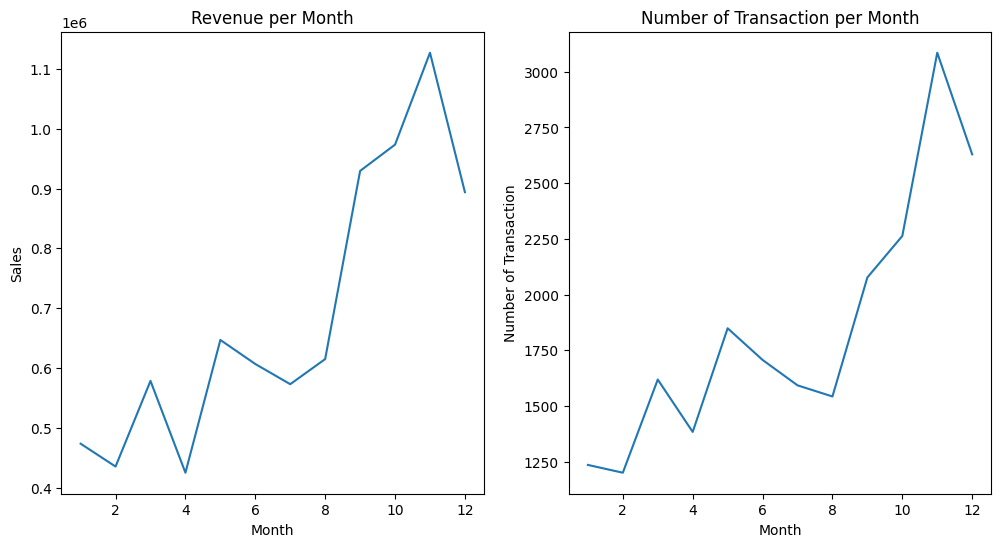

In [26]:
# create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# plot for monthly transaction data
ax[0].plot(monthly_revenue.index, monthly_revenue.values)
ax[0].set_title('Revenue per Month')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Sales')

# plot for number of transaction
ax[1].plot(total_transaction.index, total_transaction.values)
ax[1].set_title('Number of Transaction per Month')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of Transaction')
plt.show()

**Summary**
- The graph shows that there is a strong correlation between the increase in the number of transactions and the increase in revenue.
- The peak in revenue and number of transactions occurred in month 11.
- The spike in transactions in month 11 suggests that there may be seasonal or promotional factors causing the spike.

In [27]:
# calculate total revenue and revenue percentage
total_revenue = monthly_revenue.sum()
revenue_percentage = (monthly_revenue / total_revenue) * 100
revenue_percentage

,TotalSales
Month,
1,5.722423
2,5.261014
3,6.988885
4,5.136458
5,7.815548
6,7.330568
7,6.922884
8,7.429808
9,11.226116


**Summary**
- From the table, it can be seen that approximately 50% of the revenue generated by the company is only generated in the last 4 months of the year.
- This indicates that the company's cash flow is unstable, which may make it difficult for the company to meet its financial obligations throughout the year.

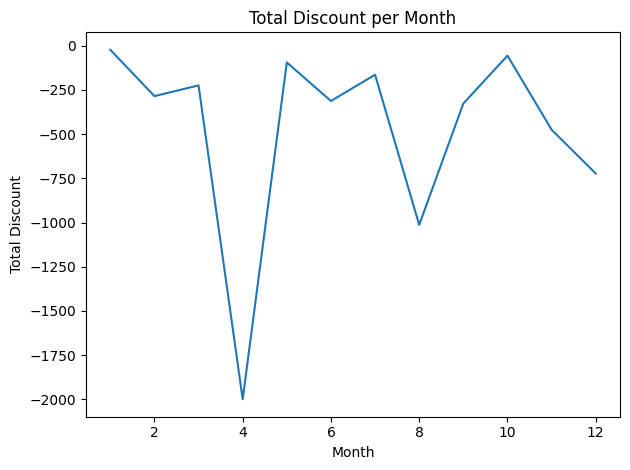

In [28]:
# filter data with Description value is discount
discount_df = df_eda[df_eda['Description'] == 'DISCOUNT']

# group total sales by month
total_discount = discount_df.groupby('Month')['TotalSales'].sum()

# plot for total discount
sns.lineplot(x=total_discount.index, y=total_discount.values)
plt.title('Total Discount per Month')
plt.xlabel('Month')
plt.ylabel('Total Discount')
plt.tight_layout()
plt.show()

**Summary**
- Month 4 is the month with the highest total discount. This means that the company has spent a considerable amount of money on promotion in this month.
- By comparing the promotional budget spent and the total revenue or number of transactions per month, it can be assessed that the marketing strategy implemented by the company is still not effective.

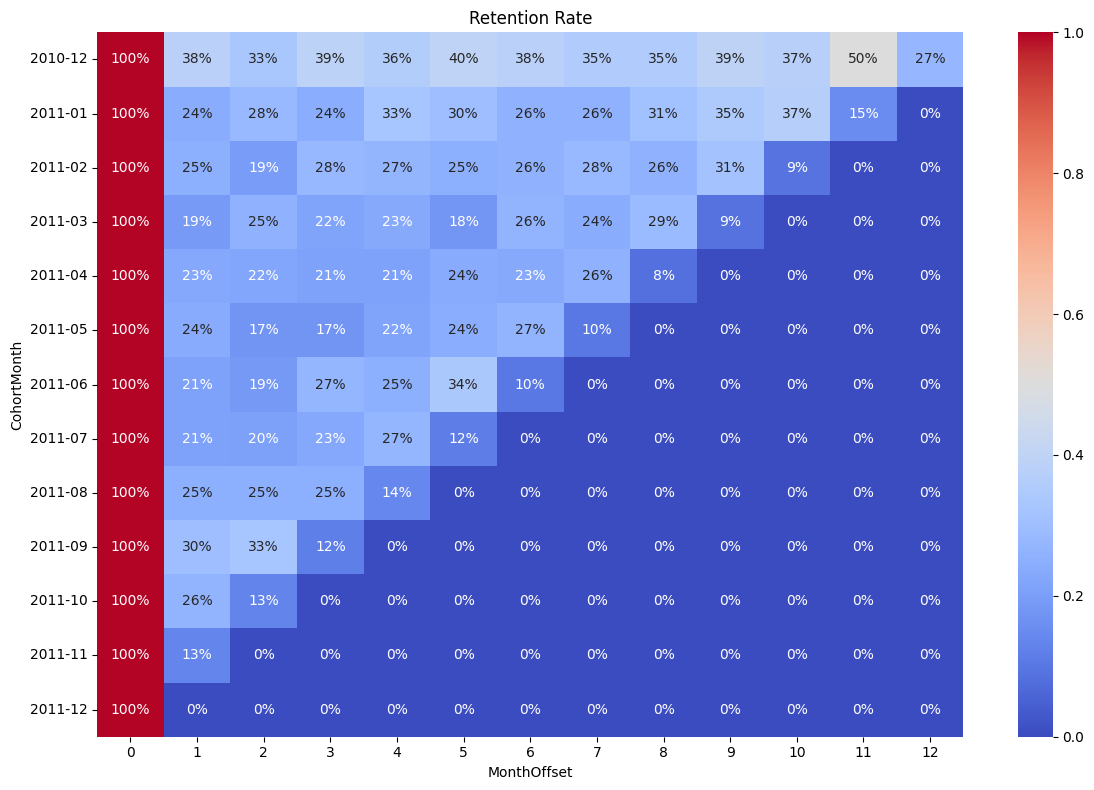

In [29]:
# identify the first purchase month for each customer
df_eda['CohortMonth'] = df_eda.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

# calculate the number of months since the first purchase
df_eda['MonthOffset'] = (df_eda['InvoiceMonth'] - df_eda['CohortMonth']).apply(lambda x: x.n)

# pivot the data to create a matrix of retention counts
cohort_data = df_eda.groupby(['CohortMonth', 'MonthOffset']).agg({'CustomerID' : 'nunique'}).reset_index()
cohort_pivot = cohort_data.pivot_table(index='CohortMonth', columns='MonthOffset', values='CustomerID').fillna(0)

# create a retention table
cohort_size = cohort_pivot.iloc[:, 0]
retention_table = cohort_pivot.divide(cohort_size, axis=0)

# plot retention table
plt.figure(figsize=(12, 8))
sns.heatmap(retention_table, annot=True, fmt='.0%', cmap='coolwarm')
plt.title('Retention Rate')
plt.tight_layout()
plt.show()

**Summary**

The December 2010 cohort has a relatively higher retention rate in the following months of the year compared to the other cohorts. This suggests that customers acquired in December 2010 have better long-term retention.

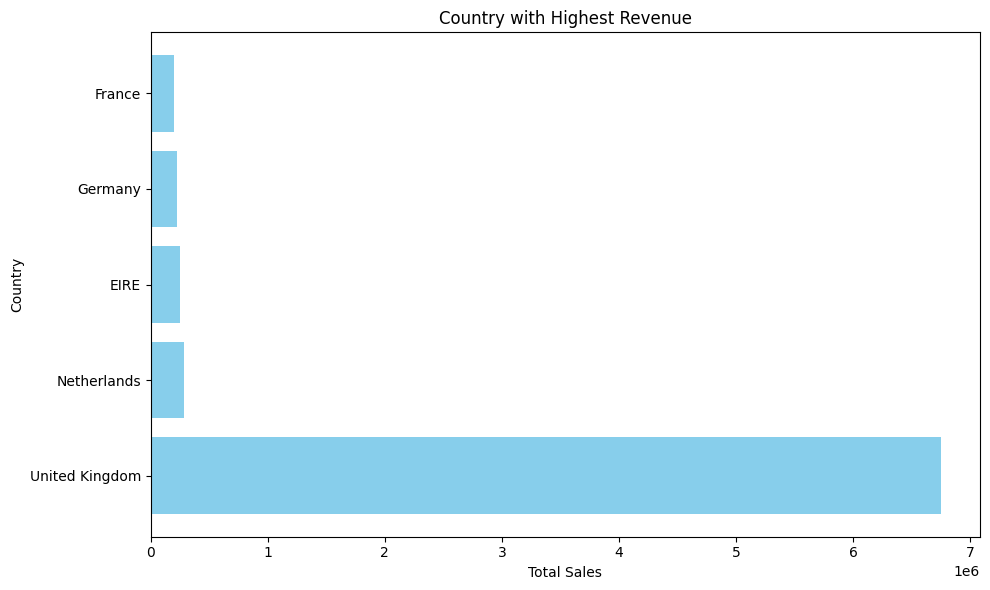

In [30]:
# Grouping data berdasarkan country dan menghitung total sales tiap negara
sales_by_country = df_eda.groupby('Country')['TotalSales'].sum().reset_index()
sales_by_country = sales_by_country.sort_values(by='TotalSales', ascending=False).head()

# Plot untuk top 5 negara berdasarkan total sales
plt.figure(figsize=(10,6))
plt.barh(sales_by_country['Country'], sales_by_country['TotalSales'], color='skyblue')
plt.title('Country with Highest Revenue')
plt.xlabel('Total Sales')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

**Summary**

The United Kingdom is the most significant market with a huge revenue contribution compared to other countries.

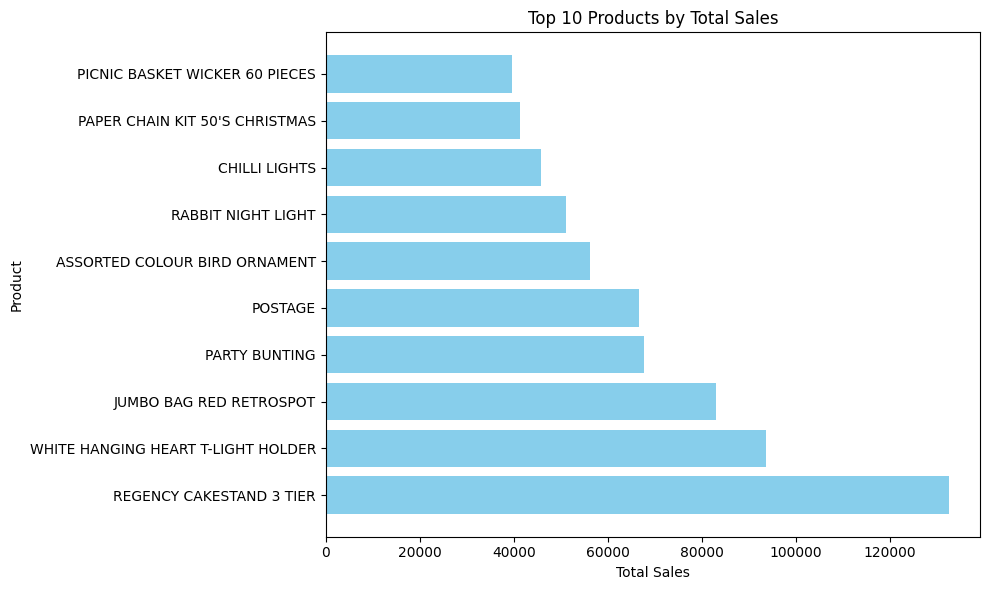

In [31]:
# Grouping data berdasarkan product dan menghitung total sales tiap product
sales_by_product = df_eda.groupby('Description')['TotalSales'].sum().reset_index()
sales_by_product = sales_by_product.sort_values(by='TotalSales', ascending=False).head(10)

# Plot untuk top 5 negara berdasarkan total sales
plt.figure(figsize=(10,6))
plt.barh(sales_by_product['Description'], sales_by_product['TotalSales'], color='skyblue')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')

plt.tight_layout()
plt.show()

**Summary**

All of the products on this list have relatively high sales, indicating that they are products that customers are interested in.

# RFM Analysis

In [32]:
# filter data with quantity >= 0
sales_data = df_eda.query('Quantity>=0')
sales_data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Month,InvoiceMonth,CohortMonth,MonthOffset
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,2010-12,2010-12,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2010-12,2010-12,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,2010-12,2010-12,0


## Generate RFM Data

In [33]:
# identify most recent transaction date
last_date = sales_data['InvoiceDate'].max()

In [34]:
# function to calculate recency
def calculate_recency(x):
    """
    Calculates recency as the number of days since the last transaction.

    Parameters:
    x (pd.Series): Series of transaction dates for a customer.

    Returns:
    int: Days since the last transaction.
    """
    return (last_date - x.max()).days

# function to calculate tenure
def calculate_tenure(x):
    """
    Calculates tenure as the number of days between the first and last transaction.

    Parameters:
    x (pd.Series): Series of transaction dates for a customer.

    Returns:
    int: Days between the first and last transaction.
    """
    return (x.max() - x.min()).days

# function to calculate frequency
def calculate_freq(x):
    """
    Calculates the number of unique transactions.

    Parameters:
    x (pd.Series): Series of transaction identifiers for a customer.

    Returns:
    int: Number of unique transactions.
    """
    return len(set(x))

# function to generate rfm data
def generate_rfmts(data):
    """
    Computes RFM metrics for each customer.

    Parameters:
    data (pd.DataFrame): DataFrame with columns 'CustomerID', 'InvoiceDate', 'InvoiceNo', 'TotalSales'.

    Returns:
    pd.DataFrame: DataFrame with columns 'Recency', 'Tenure', 'Frequency', 'Monetary'.
    """
    agg_dict = {
        'InvoiceDate' : [calculate_recency, calculate_tenure],
        'InvoiceNo' : [calculate_freq],
        'TotalSales' : 'sum'
    }

    # group rfm data by CustomerID
    data_rfmts = data.groupby('CustomerID').agg(agg_dict)
    data_rfmts.columns = ['Recency', 'Tenure', 'Frequency', 'Monetary']

    return data_rfmts

In [35]:
# generate RFM data from the sales data
df_rfm = generate_rfmts(data=sales_data)
print(f'RFM data shape: {df_rfm.shape}\n')
df_rfm.head()

RFM data shape: (4338, 4)



,Recency,Tenure,Frequency,Monetary
CustomerID,,,,
12346,325,0,1,77183.60
12347,1,365,7,4310.00
12348,74,282,4,1797.24
12349,18,0,1,1757.55
12350,309,0,1,334.40


### RFM Data Descriptive

In [36]:
# show data decriptive
df_rfm.describe()

,Recency,Tenure,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,91.536422,130.448594,4.272015,2048.688081
std,100.014169,132.039554,7.697998,8985.230220
min,0.000000,0.000000,1.000000,3.750000
25%,17.000000,0.000000,1.000000,306.482500
50%,50.000000,92.500000,2.000000,668.570000
75%,141.000000,251.750000,5.000000,1660.597500
max,373.000000,373.000000,209.000000,280206.020000


- There is data with a total frequency of 1 time and a duration of 0 days. This indicates that the customer is a one-time buyer.
- There are possible outliers in the Frequency and Monetary columns.

### Check for Frequency

In [37]:
# filter data with frequency = 1 and tenure = 0
df_rfm[(df_rfm['Frequency'] == 1) & (df_rfm['Tenure'] == 0)].head()

,Recency,Tenure,Frequency,Monetary
CustomerID,,,,
12346,325,0,1,77183.60
12349,18,0,1,1757.55
12350,309,0,1,334.40
12353,203,0,1,89.00
12354,231,0,1,1079.40


It is known that there are many one-time buyers in this data. Customers who only do one transaction with the company need to be excluded from this analysis. This is done to focus the analysis on customers who are more likely to provide long-term value.

In [38]:
# exclude unit price with 0 value
df_rfm = df_rfm[df_rfm['Frequency'] >= 2]

In [39]:
# sanity check
df_rfm.describe()

,Recency,Tenure,Frequency,Monetary
count,2845.000000,2845.000000,2845.000000,2845.000000
mean,57.873814,198.905448,5.989104,2907.985706
std,70.236590,113.866961,9.044247,10899.538240
min,0.000000,0.000000,2.000000,6.900000
25%,10.000000,98.000000,2.000000,614.660000
50%,29.000000,207.000000,4.000000,1154.470000
75%,74.000000,299.000000,6.000000,2429.830000
max,372.000000,373.000000,209.000000,280206.020000


There are potential outliers in the Frequency and Monetary columns, so it is necessary to treat both columns.

### Check Outliers

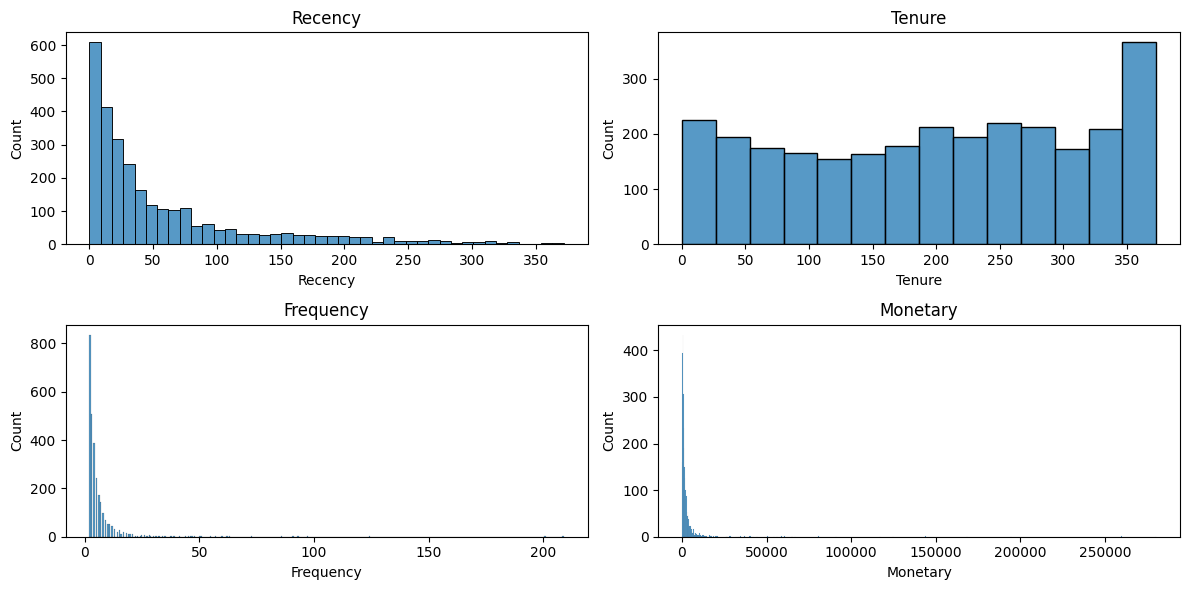

In [40]:
# create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))
axes = axes.flatten()

# plot for histogram
for i, col in enumerate(df_rfm.columns):
    sns.histplot(df_rfm[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Of the four graphs above, the Frequency and Money graphs are skewed. This means that there are data outliers in these two data sets, so they need to be removed.

In [41]:
def remove_outlier(data, cols):
    """
    Removes outliers from specified columns in a DataFrame using the IQR method.

    Parameters:
    data (pd.DataFrame): The input DataFrame containing the data.
    cols (list): List of column names from which to remove outliers.

    Returns:
    pd.DataFrame: A DataFrame with outliers removed from the specified columns.
    """
    data_clean = data.copy()
    for col in cols:
        # calculate the q1, q3 and iqr
        q1, q3 = np.quantile(data_clean[col], q=[0.25, 0.75])
        iqr = q3 - q1

        # define the upper and lower bounds
        upper_bound = q3 + 1.5*iqr
        lower_bound = q1 - 1.5*iqr

        # filtering data
        cond_1 = data_clean[col] <= upper_bound
        cond_2 = data_clean[col] >= lower_bound
        data_clean = data_clean[cond_1 & cond_2]

    return data_clean

In [42]:
# remove outlier data from the df_rfm data
df_rfm = remove_outlier(data=df_rfm,
                        cols = ['Frequency', 'Monetary'])

# print data shape and show data descriptive
print(f'RFM data shape: {df_rfm.shape}\n')
df_rfm.describe()

RFM data shape: (2450, 4)



,Recency,Tenure,Frequency,Monetary
count,2450.000000,2450.000000,2450.000000,2450.000000
mean,63.947755,181.091837,4.010612,1255.333801
std,72.297080,108.737772,2.308905,929.210252
min,0.000000,0.000000,2.000000,6.900000
25%,14.000000,83.000000,2.000000,558.765000
50%,35.000000,186.000000,3.000000,974.470000
75%,85.000000,272.000000,5.000000,1744.747500
max,372.000000,372.000000,12.000000,4055.720000


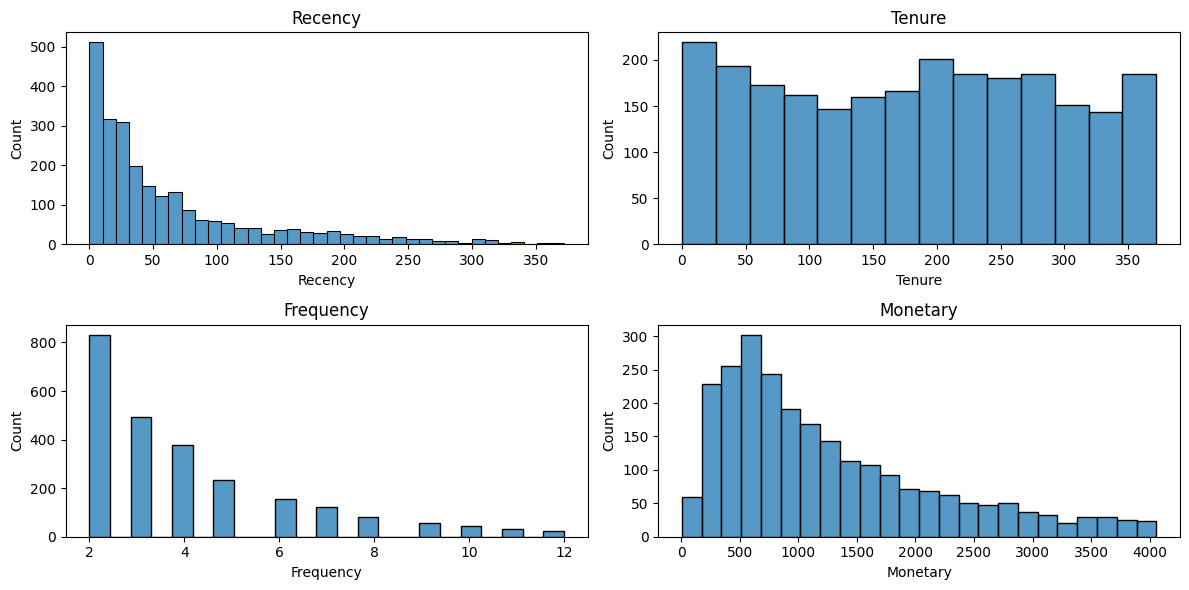

In [43]:
# create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))
axes = axes.flatten()

# plot for histogram
for i, col in enumerate(df_rfm.columns):
    sns.histplot(df_rfm[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Because in the analysis we only need Recency, Frequency and Monetary data, so Tenure data must be excluded.

In [44]:
# filter out rfm data for the analysis
df_rfm_data = df_rfm[['Recency', 'Frequency', 'Monetary']]

## Normalize Data

In [45]:
from sklearn.preprocessing import MinMaxScaler

def fit_scaler(data):
    """
    Fits a MinMaxScaler to the given data.

    Parameters:
    data (pd.DataFrame): The input DataFrame containing the data to be scaled.

    Returns:
    MinMaxScaler: The fitted MinMaxScaler object.
    """
    # initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # fit the scaler to the data
    scaler.fit(data)

    return scaler

def transform_scaler(data, scaler):
    """
    Transforms the given data using a fitted MinMaxScaler.

    Parameters:
    data (pd.DataFrame): The input DataFrame containing the data to be scaled.
    scaler (MinMaxScaler): The fitted MinMaxScaler object.

    Returns:
    pd.DataFrame: A DataFrame containing the scaled data.
    """
    # transform the data using the fitted scaler
    df_scaler = pd.DataFrame(scaler.transform(data))

    # set the index and columns of the scaled DataFrame
    df_scaler.index = data.index
    df_scaler.columns = data.columns

    print(f'Data shape: {data.shape}')
    return df_scaler

In [46]:
# fit scaler using df_rfm_data data
scaler = fit_scaler(data = df_rfm_data)

# transform scaler using df_rfm_data data
df_scaled = transform_scaler(data = df_rfm_data,
                             scaler = scaler)

df_scaled.head()

Data shape: (2450, 3)


,Recency,Frequency,Monetary
CustomerID,,,
12348,0.198925,0.2,0.442188
12352,0.094086,0.6,0.617251
12356,0.059140,0.1,0.692678
12358,0.002688,0.0,0.286790
12360,0.137097,0.1,0.655786


In [47]:
# sanity check
df_scaled.describe()

,Recency,Frequency,Monetary
count,2450.000000,2450.000000,2450.000000
mean,0.171903,0.201061,0.308345
std,0.194347,0.230891,0.229501
min,0.000000,0.000000,0.000000
25%,0.037634,0.000000,0.136303
50%,0.094086,0.100000,0.238976
75%,0.228495,0.300000,0.429223
max,1.000000,1.000000,1.000000


## Elbow Method

In [48]:
from sklearn.cluster import KMeans

# initialize an empty list
inertia = []

# iterate over a range of cluster numbers
for i in range(1,11):
    # create a KMeans instance
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)

    # append the inertia to the list
    inertia.append(kmeans.inertia_)

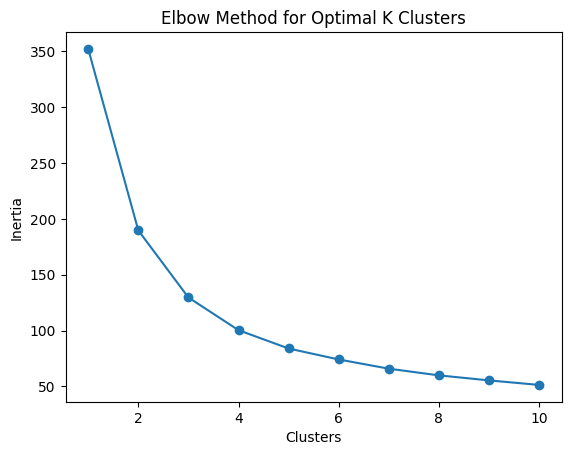

In [49]:
# plot for elbow method
plt.plot(range(1,11), inertia, marker='o')
plt.title('Elbow Method for Optimal K Clusters')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

- The optimal number of clusters is the point where adding another cluster does not significantly decrease WCSS.
- This point can be found by looking for a sharp bend or elbow in the WCSS graph.
- If so, then adding more clusters does not improve the clustering performance.

**Elbow method analysis**

- Based on the Elbow method information, We will cluster our customer into 3 groups.

## Predict Data

In [50]:
optimal_clusters = 3 # K optimum clusters

# create K-Means instance with optimum clusters
kmeans_best = KMeans(n_clusters=optimal_clusters)

# fit and predict the model
data_labels = kmeans_best.fit_predict(df_scaled)

In [51]:
data_labels

array([2, 0, 0, ..., 2, 2, 2], dtype=int32)

In [52]:
# retrieve cluster centroids from the fitted KMeans model
centroids = kmeans_best.cluster_centers_

# create a dataframe from the centroids
df_centroid = pd.DataFrame(centroids,
                           columns=['Recency', 'Frequency', 'Monetary']).rename_axis('Cluster', axis='index')
df_centroid

,Recency,Frequency,Monetary
Cluster,,,
0,0.083896,0.493231,0.607178
1,0.539208,0.056098,0.171374
2,0.104715,0.107194,0.209005


In [53]:
# inverse transform the scaled data to its original scale
data_cluster = pd.DataFrame(scaler.inverse_transform(df_scaled))
data_cluster.index = df_scaled.index
data_cluster.columns = df_scaled.columns

# add the cluster labels to the DataFrame
data_cluster = data_cluster[['Recency', 'Frequency', 'Monetary']]
data_cluster['Label'] = data_labels
data_cluster.head()

,Recency,Frequency,Monetary,Label
CustomerID,,,,
12348,74.0,4.0,1797.24,2
12352,35.0,8.0,2506.04,0
12356,22.0,3.0,2811.43,0
12358,1.0,2.0,1168.06,2
12360,51.0,3.0,2662.06,0


In [54]:
# group cluster data by its labels
data_cluster.groupby('Label').agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Monetary' : 'mean',
    'Label' : 'count'
}).round(1)

,Recency,Frequency,Monetary,Label
Label,,,,
0,31.2,6.9,2465.3,650
1,200.6,2.6,700.8,410
2,39.0,3.1,853.1,1390


**Summary**
- Cluster 0: low recency, high frequency and very high monetary
- Cluster 1: high recency, low frequency and low monetary
- Cluster 2: low recency, medium frequency and medium monetary

The three clusters must be renamed:
- Cluster 0: Best Customer
- Cluster 1: At Risk Customer
- Cluster 2: Regular Customer

In [56]:
def rename_label(row):
    """
    Classifies customers based on their cluster label.

    Parameters:
    row (pd.Series): A row of the DataFrame, including the 'Label' column.

    Returns:
    str: A customer classification based on the cluster label.
    """
    if row['Label'] == 0:
        return 'Best Customer'
    elif row['Label'] == 1:
        return 'At Risk Customer'
    else:
        return 'Regular Customer'

In [57]:
# rename data label of data_cluster data
data_cluster['Label'] = data_cluster.apply(rename_label, axis=1)
data_cluster

,Recency,Frequency,Monetary,Label
CustomerID,,,,
12348,74.0,4.0,1797.24,Regular Customer
12352,35.0,8.0,2506.04,Best Customer
12356,22.0,3.0,2811.43,Best Customer
12358,1.0,2.0,1168.06,Regular Customer
12360,51.0,3.0,2662.06,Best Customer
...,...,...,...,...
18270,37.0,2.0,283.15,Regular Customer
18272,2.0,6.0,3078.58,Best Customer
18273,1.0,3.0,204.00,Regular Customer


In [58]:
# count total percentage of each segment
condition = data_cluster['Label'].value_counts()
condition/len(data_cluster)

,count
Label,
Regular Customer,0.567347
Best Customer,0.265306
At Risk Customer,0.167347


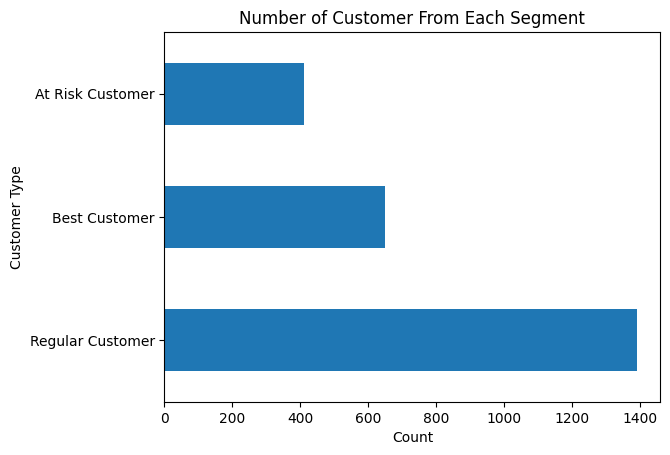

In [59]:
# plot total percentage from each segment
condition.plot(kind='barh')
plt.title('Number of Customer From Each Segment')
plt.ylabel('Customer Type')
plt.xlabel('Count')
plt.show()

**Summary**
- **The Regular Customer** segment is the largest group at 56% of total customers, indicating that the majority of customers are in this category.
- **The Best Customer** segment, which represents 26% of total customers, is a smaller group than Regular Customers, but contributes more to revenue or profit.
- **The At Risk Customer** segment, which represents 16% of total customers, shows that there is a group of customers who may be at risk of losing interest or stopping transactions.

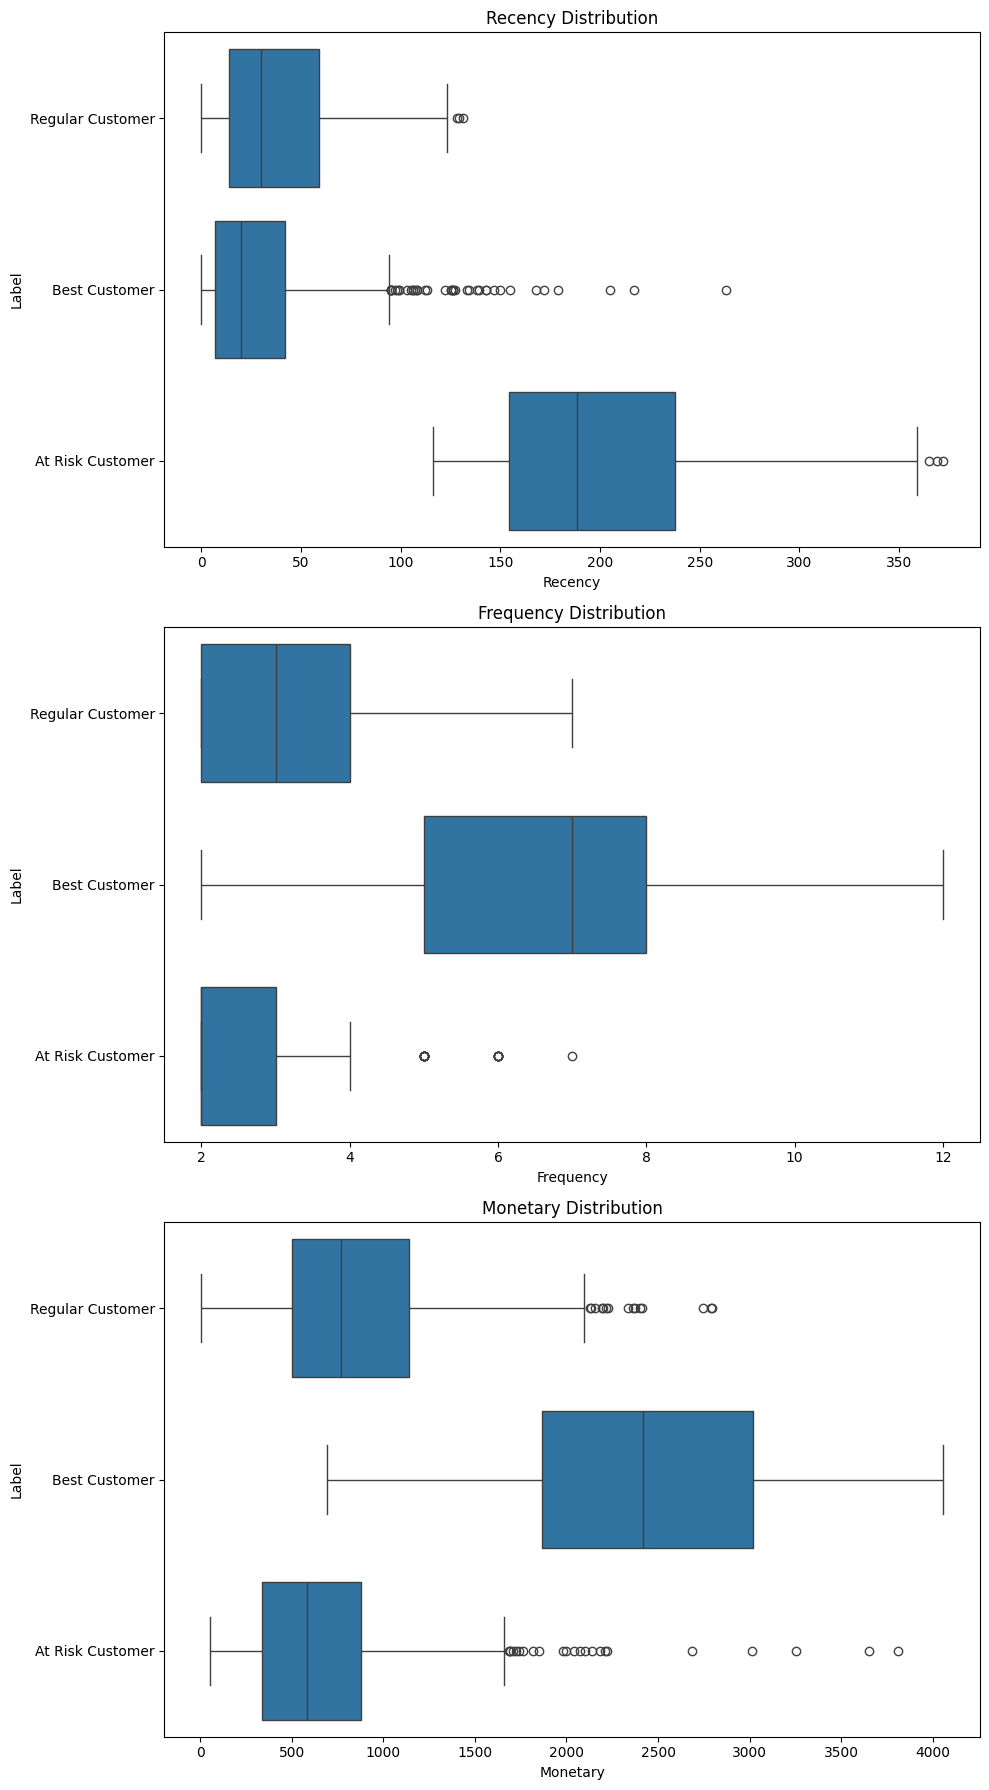

In [60]:
# create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,18))

# plot for RFM distribution for each segment
for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.boxplot(data=data_cluster,
                y='Label',
                x=col,
                ax=axes[i])
    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

**Best Customer**

- Recency: This group has a low recency, meaning they have purchased recently. This indicates high engagement and loyalty.
- Frequency: Their purchase frequency is high, suggesting consistent buying behavior.
- Monetary Value: Best Customers spend significantly more compared to other segments. They are valuable customers who contribute substantially to the overall revenue.

This segment represents the most desirable customer type due to their high spending, frequent purchases, and recent activity.



**Regular Customer**

- Recency: This group has a wider range of recency, indicating varying time intervals since their last purchase. Some customers have purchased recently, while others haven't in a while.
- Frequency: Their purchase frequency is moderate, with some customers buying more frequently than others.
- Monetary Value: The spending habits of this group vary significantly. There are customers with both high and low spending amounts.

Overall, Regular Customers exhibit average behavior across all three metrics. They are neither the most active nor the least engaged customers.



**At-Risk Customer**

- Recency: This group has a high recency, indicating a long time since their last purchase. This suggests a potential loss of interest or engagement.
- Frequency: Their purchase frequency is low, confirming a lack of engagement.
- Monetary Value: This group has a lower average spending amount compared to other segments.

At-Risk Customers are customers who are likely to churn or have reduced engagement with the business. They require targeted retention efforts to regain their loyalty.

**Marketing Strategy For Each Segment:**

**Best Customer**

**Objective**: Maintain customer loyalty and increase lifetime value.

**Strategy**:
- VIP Program: Offer a VIP program that provides exclusive access to new products, special discounts, or exclusive events.
- Referral Program: Offer incentivize customers to refer their friends and family.
- New products or services: Let them know in advance about new products or services that may be of interest to them.
- Deeper personalization: Perform deeper analytics to understand customer preferences and deliver highly relevant offers.

**Regular Customer**

**Objective:** Increase purchase frequency and transaction value.

**Strategy:**
- Upselling and cross-selling: Offer complementary or higher-priced products that are relevant to previous purchases.
- Frequent buyer discounts: Offer discounts or rewards after a certain number of purchases to encourage them to shop more often.
- Personalization: Send them product recommendations based on their purchase history.
- Bundle offers: Create bundles that offer discounts when multiple products are purchased together. This can encourage customers to spend more per transaction.

**At Risk Customer**

**Objective:** Reactivate purchases and increase engagement.

**Strategy:**
- Win-back campaign: Offer big discounts or free products to lure them back.
- Limited edition products: Offer limited edition products or short promos to create urgency.
- Satisfaction survey: Ask them why they buy less and use the feedback to improve.
- Personalized email campaigns: Send personalized emails with special offers to entice them back.

# Indepth Analysis

To perform indepth analysis, we need to merge the original data (sales_data) with the cluster categorized data.

In [61]:
# show and print data cluster shape
print(f'Data cluster shape: {data_cluster.shape}\n')
data_cluster.head()

Data cluster shape: (2450, 4)



,Recency,Frequency,Monetary,Label
CustomerID,,,,
12348,74.0,4.0,1797.24,Regular Customer
12352,35.0,8.0,2506.04,Best Customer
12356,22.0,3.0,2811.43,Best Customer
12358,1.0,2.0,1168.06,Regular Customer
12360,51.0,3.0,2662.06,Best Customer


In [62]:
# copy data
customer_segment = data_cluster.copy().reset_index()

# filter out customer_segment data
customer_segment = customer_segment[['CustomerID', 'Label']]
customer_segment.head()

,CustomerID,Label
0,12348,Regular Customer
1,12352,Best Customer
2,12356,Best Customer
3,12358,Regular Customer
4,12360,Best Customer


In [63]:
# show and print sales data shape
print(f'Sales data shape: {sales_data.shape}\n')
sales_data.head(3)

Sales data shape: (392692, 14)



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Month,InvoiceMonth,CohortMonth,MonthOffset
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,2010-12,2010-12,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2010-12,2010-12,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,2010-12,2010-12,0


In [64]:
# copy sales data
trx_df = sales_data.copy()

# drop missing value from sales data
trx_df = trx_df.dropna()
trx_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Month,InvoiceMonth,CohortMonth,MonthOffset
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,2010-12,2010-12,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2010-12,2010-12,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,2010-12,2010-12,0


In [65]:
# merge data cluster and sales data
trx_df = trx_df.merge(customer_segment[['CustomerID', 'Label']], on='CustomerID', how='left')

In [66]:
# check missing value of merge data
trx_df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalSales,0
Year,0


After merging the two data sets, there are many missing values in the Label column. This can be caused by the incompatibility of the number of CustomerIDs from the two tables, because previously outliers and filtering were removed from the cluster data.

### Analysis

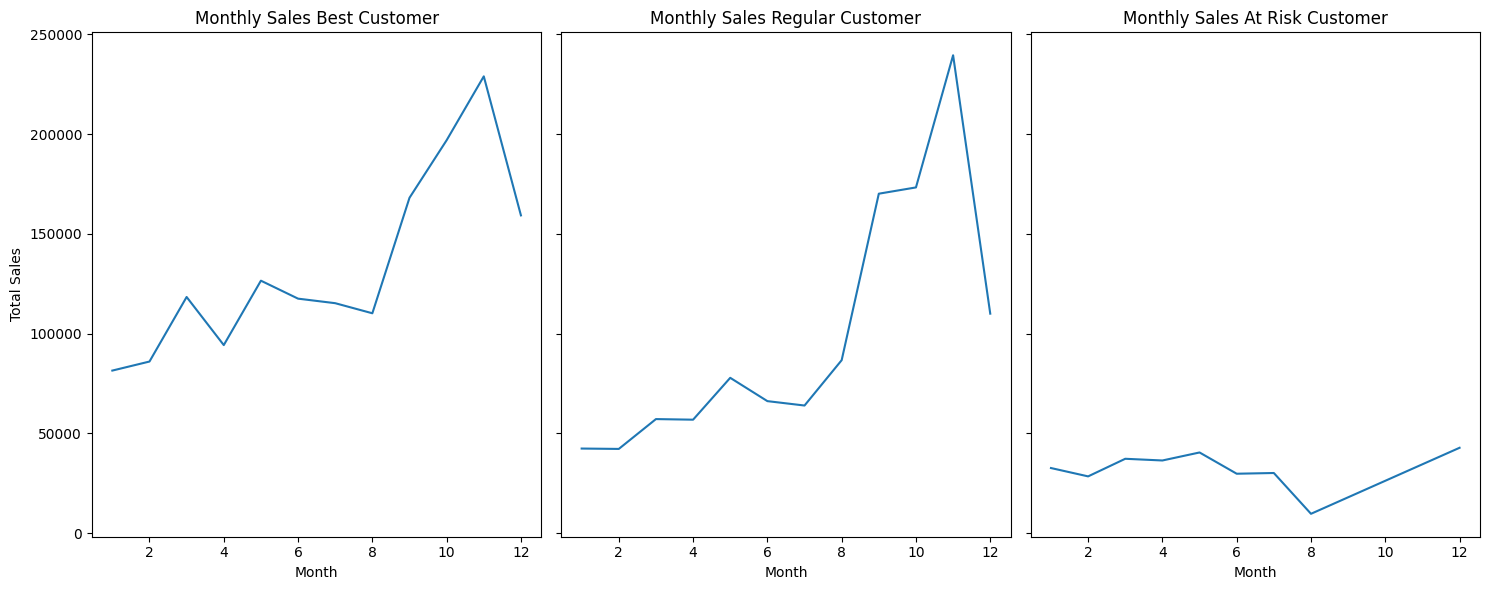

In [68]:
# define label list for iteration
label = ['Best Customer', 'Regular Customer', 'At Risk Customer']

# create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,6), sharey=True)

# iterate for plotting lineplot
for i, segment in enumerate(label):
    data = trx_df[trx_df['Label'] == segment]
    segment_monthly_sales = data.groupby('Month')['TotalSales'].sum()

    # plot for monthly sales
    sns.lineplot(x=segment_monthly_sales.index,
                 y=segment_monthly_sales.values,
                 ax=axes[i])
    axes[i].set_title(f'Monthly Sales {segment}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Total Sales')

plt.tight_layout()
plt.show()

**Summary**

**Best Customer**:
- The graph shows a consistent increase in total sales throughout the year, with a significant spike in month 11.
- This indicates that Best Customers tend to make purchases more consistently throughout the year, with a peak in purchases toward the end of the year, perhaps due to promotions or the holiday season.

**Regular Customer:**
- Similar to Best Customer, but on a slightly smaller scale. The graph shows a gradual and significant increase throughout the year.
- Regular customers also show an increased buying pattern towards the end of the year, but with slightly less consistency than Best Customers.

**At Risk Customer**
- The graph shows larger fluctuations, with a sharp drop in month 8 and a slight increase in month 12.
- At-risk customers show a decrease in purchases in the middle of the year, which could indicate a loss of interest or a move to a competitor. A small increase in month 12 could be due to year-end promotions or seasonal needs.

**Marketing Strategy**

**Year End (High Revenue Period):**
- Discounts and special offers: Continue and increase holiday and year-end promotions to drive more purchases.
- Aggressive Promotions: Allocate more promotional budget in months 11 and 12 to maximize sales, including holiday, year-end, and Black Friday discounts.

**Mid-Year (Low Revenue Period):**
- Loyalty program: Enhance loyalty programs to retain at-risk customers, such as offering rewards for repeat purchases.
- Up-sell and cross-sell: Focus on upselling and cross-selling to core customers to increase the value of their purchases and create attractive product bundles.
- Personalized communications: Send more personalized and relevant offers to at-risk customers to bring them back, such as email marketing or exclusive offers.

In [76]:
revenue_per_segment = trx_df.groupby('Label')['TotalSales'].sum()
revenue_per_segment = revenue_per_segment / revenue_per_segment.sum() * 100
revenue_per_segment

,TotalSales
Label,
At Risk Customer,9.341789
Best Customer,52.101432
Regular Customer,38.556779


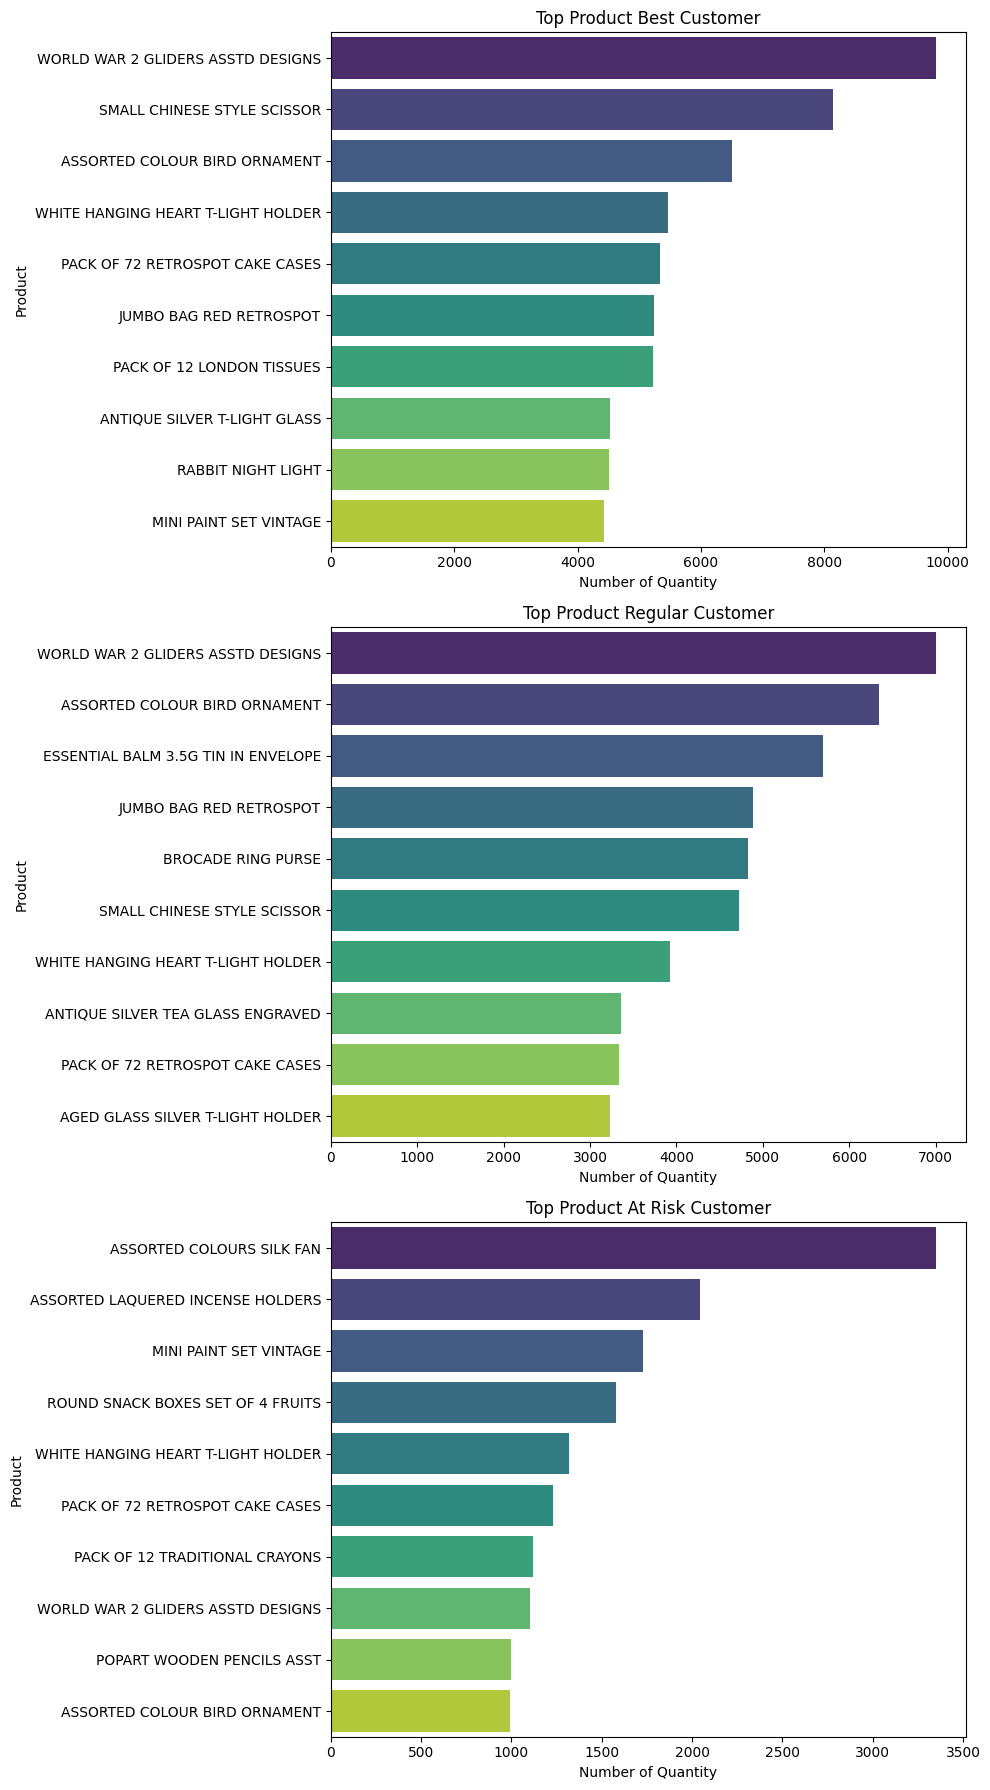

In [72]:
# define label list for iteration
label = ['Best Customer', 'Regular Customer', 'At Risk Customer']

# create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,18))

# iterate for plotting lineplot
for i, segment in enumerate(label):
    data = trx_df[trx_df['Label'] == segment]
    segment_product = data.groupby('Description')['Quantity'].sum()
    segment_product = segment_product.sort_values(ascending=False).head(10)

    # plot for monthly sales
    sns.barplot(x=segment_product.values,
                y=segment_product.index,
                palette='viridis',
                ax=axes[i])
    axes[i].set_title(f'Top Product {segment}')
    axes[i].set_xlabel('Number of Quantity')
    axes[i].set_ylabel('Product')

plt.tight_layout()
plt.show()

**Summary**

- The following products are the products with the highest total transactions in each segment.
- Businesses can use these products in marketing campaigns such as advertisements, social media, and newsletters. Because these products are already proven to be popular with customers, they are more likely to attract attention and drive more sales.
- Make sure these top 10 products are always in stock, especially during major promotional periods, to avoid stock-outs and ensure customer satisfaction.

In [77]:
# group by customer_type
grouped_segment = trx_df.groupby('Label').agg({'UnitPrice':['min','mean','max'],
                                               'Quantity':['min','mean','max']})

# show the data
grouped_segment

UnitPrice                    Quantity                
                       min      mean      max      min      mean   max
Label                                                                 
At Risk Customer     0.001  3.348284   550.64        1  9.192242  1728
Best Customer        0.040  2.953793  1867.86        1  9.528051  3906
Regular Customer     0.001  2.852026   599.50        1  8.564837  3186

**Summary**
- The three clusters have average unit prices and quantities that are not too different.
- Typically, best customer tends to purchase with higher quantity and higher price.
- At Risk customers tend to have lower price and volume values than other segments.